In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [25]:
data=pd.read_csv("sign_mnist_test.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [26]:
real_x=data.iloc[:,1:785].values
real_y=data.iloc[:,0].values

In [47]:
training_x,testing_x,training_y,testing_y=train_test_split(real_x,real_y,test_size=0.20,random_state=0)
testing_x

array([[141, 143, 149, ...,  98, 135, 208],
       [203, 206, 208, ..., 233, 233, 230],
       [129, 129, 129, ..., 146, 146, 145],
       ...,
       [151, 154, 155, ..., 175, 173, 172],
       [164, 164, 165, ..., 211, 210, 209],
       [181, 182, 182, ..., 207, 205, 205]], dtype=int64)

In [48]:
s_c=StandardScaler()
training_x=s_c.fit_transform(training_x)
testing_x=s_c.transform(testing_x)
test_x=s_c.transform(i)
test_x


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.67139468,  1.74005152,  1.63401278,  1.54264003,  1.59568677,
         1.62361374,  1.65615625,  1.60842609,  1.74745586,  1.73384442,
         1.80514007,  1.84377414,  1.80301474,  1.81445533,  1.64996748,
         1.72598605,  1.81548171,  1.88391402,  1.88668133,  1.83518606,
         1.98927741,  1.94807911,  1.96561665,  1.92056789,  1.85571086,
         1.68260635,  1.66008781,  1.64676522,  1.64707443,  1.63884618,
         1.58073912,  1.56617438,  1.54879295,  1.61875089,  1.54205192,
         1.54973232,  1.67439527,  1.73912297,  1.74100978,  1.6897055 ,
         1.72899971,  1.70818531,  1.60435123,  1.71244694,  1.71589884,
         1.82629702,  1.81190436,  1.77753855,  1.89898105,  1.86125166,
         1.78506853,  1.82975109,  1.78938636,  1.66460298,  1.63612957,
         1.6272231 ,  1.57909497,  1.58876129,  1.42977106,  1.48644354,
         1.49277334,  1.50116663,  1.47532391,  1.51621675,  1.58752819,
         1.62795249,  1.72028812,  1.58676388,  1.6

In [38]:
cls_svc = SVC(kernel='rbf',random_state=0)
cls_svc.fit(training_x,training_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred=cls_svc.predict(testing_x)
y_pred

array([13,  6, 19, ..., 19,  2, 12], dtype=int64)

In [40]:
testing_y

array([13,  6, 19, ..., 19,  2, 12], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(testing_y,y_pred)
c_m

array([[65,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 75,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 67,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 97,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 65,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 97,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

In [41]:
accuracy=cls_svc.score(testing_x,testing_y)
accuracy

1.0

In [42]:
from sklearn.metrics import precision_recall_fscore_support

In [43]:
precision_recall_fscore_support(testing_y, y_pred, average=None)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]),
 array([65, 75, 67, 51, 97, 50, 65, 97, 59, 55, 38, 88, 57, 51, 69, 29, 26,
        47, 52, 50, 72, 42, 62, 71], dtype=int64))

In [44]:
import cv2

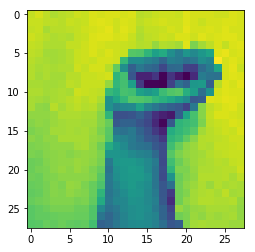

In [45]:
im = cv2.imread("tryy.jpg")
img = cv2.resize(im,(28,28))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [46]:
i = np.reshape(img,(1,784))
i

array([[220, 223, 219, 216, 218, 219, 222, 221, 224, 223, 224, 224, 223,
        224, 218, 219, 221, 222, 222, 221, 225, 223, 223, 223, 222, 222,
        224, 223, 221, 221, 219, 219, 218, 221, 220, 221, 224, 225, 224,
        222, 224, 223, 219, 221, 222, 223, 222, 222, 225, 223, 221, 223,
        223, 224, 224, 223, 220, 221, 215, 218, 218, 219, 220, 222, 223,
        224, 226, 222, 225, 223, 217, 220, 220, 221, 223, 222, 226, 223,
        223, 224, 223, 225, 223, 223, 222, 220, 218, 216, 217, 216, 220,
        221, 224, 225, 225, 223, 224, 221, 216, 219, 220, 222, 221, 224,
        224, 222, 225, 223, 224, 225, 225, 223, 220, 219, 216, 216, 216,
        220, 220, 222, 224, 223, 222, 222, 221, 220, 217, 218, 212, 217,
        216, 214, 225, 207, 214, 219, 224, 220, 224, 225, 219, 218, 214,
        214, 215, 217, 221, 222, 224, 222, 224, 222, 221, 199, 198, 189,
        179, 184, 170, 161, 173, 167, 174, 180, 225, 227, 223, 224, 218,
        216, 215, 214, 215, 217, 221, 222, 221, 223

In [49]:
y_pred=cls_svc.predict(test_x)
y_pred

array([13], dtype=int64)

In [50]:
test_x

array([[ 1.67139468,  1.74005152,  1.63401278,  1.54264003,  1.59568677,
         1.62361374,  1.65615625,  1.60842609,  1.74745586,  1.73384442,
         1.80514007,  1.84377414,  1.80301474,  1.81445533,  1.64996748,
         1.72598605,  1.81548171,  1.88391402,  1.88668133,  1.83518606,
         1.98927741,  1.94807911,  1.96561665,  1.92056789,  1.85571086,
         1.68260635,  1.66008781,  1.64676522,  1.64707443,  1.63884618,
         1.58073912,  1.56617438,  1.54879295,  1.61875089,  1.54205192,
         1.54973232,  1.67439527,  1.73912297,  1.74100978,  1.6897055 ,
         1.72899971,  1.70818531,  1.60435123,  1.71244694,  1.71589884,
         1.82629702,  1.81190436,  1.77753855,  1.89898105,  1.86125166,
         1.78506853,  1.82975109,  1.78938636,  1.66460298,  1.63612957,
         1.6272231 ,  1.57909497,  1.58876129,  1.42977106,  1.48644354,
         1.49277334,  1.50116663,  1.47532391,  1.51621675,  1.58752819,
         1.62795249,  1.72028812,  1.58676388,  1.6